<a href="https://colab.research.google.com/github/fiftybucks101/K-Means/blob/main/K_Means_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [41]:
df = pd.read_csv('/content/student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


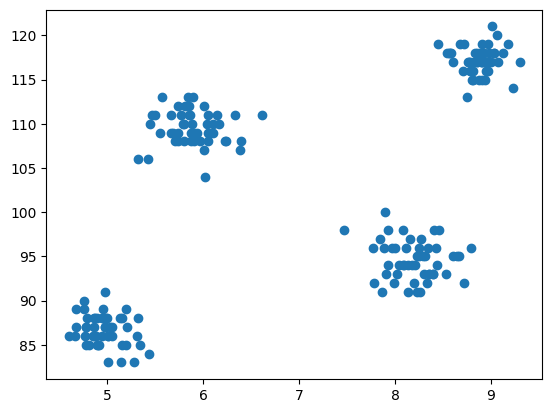

In [42]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [43]:
from sklearn.cluster import KMeans

In [44]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [45]:
wcss

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 514.1616803171117,
 388.8524026875981,
 295.4391895943191,
 234.48687343199217,
 199.1703850136915,
 175.12714854629027]

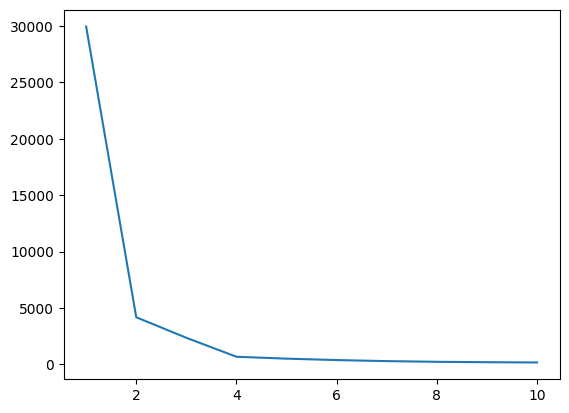

In [46]:
plt.plot(range(1,11),wcss)

**From 4, our wcss is stable. So 4 is our valid number of cluster**

In [47]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

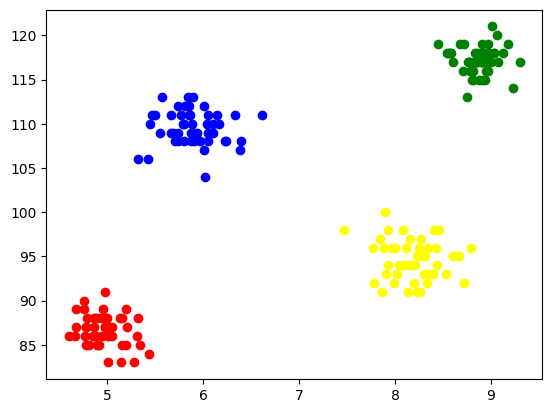

In [48]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color = 'blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color = 'red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color = 'green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color = 'yellow')

###**K-Means on 3D Data**

In [49]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-3.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]
X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [50]:
y

array([1, 3, 0, 1, 3, 1, 0, 3, 0, 1, 0, 1, 0, 3, 1, 3, 2, 2, 2, 2, 0, 2,
       3, 0, 0, 1, 3, 2, 1, 3, 2, 1, 1, 0, 3, 1, 0, 3, 2, 2, 0, 3, 0, 1,
       3, 2, 2, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 2, 1, 0, 3, 3, 3, 2, 0,
       2, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 3, 0, 3, 3, 0, 3, 1, 0,
       0, 3, 1, 3, 3, 2, 3, 0, 0, 1, 0, 0, 1, 0, 0, 1, 3, 3, 3, 2, 2, 3,
       2, 1, 2, 3, 2, 3, 0, 3, 2, 1, 0, 1, 2, 2, 3, 0, 2, 1, 2, 0, 2, 0,
       3, 0, 1, 2, 2, 1, 3, 3, 0, 1, 1, 3, 0, 1, 1, 0, 3, 1, 3, 1, 2, 2,
       1, 2, 0, 3, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1,
       3, 2, 2, 0, 3, 3, 2, 2, 2, 0, 3, 0, 1, 1, 3, 3, 1, 2, 2, 1, 3, 0,
       2, 3])

In [51]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2])
fig.show()

In [52]:
wcss = []
for i in range(1,21):
  km=KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

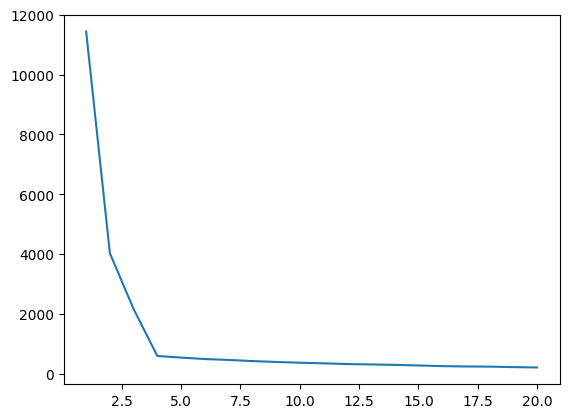

In [53]:
plt.plot(range(1,21),wcss)

In [54]:
km = KMeans(n_clusters = 4)
y_pred = km.fit_predict(X)

In [55]:
df = pd.DataFrame()
df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [56]:
fig = px.scatter_3d(df,x='col1',y='col2',z='col3',color='label')
fig.show()